# 1. Data preprocesiranje

#### Link ka podacima (Kaggle) : https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

### Import biblioteka i podataka

- Numpy i pandas za manipulaciju podataka
- matplotlib i seaborn za vizuelizacije
- I na kraju sami podaci, odnosno csv fajl

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('data.csv')
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Istrazivanje podataka 
- Broj kolona/redova
- Target kolona
- Kategoricki i numericki podaci
- Detalji dataseta

In [4]:
dataset.shape
# Dataset ima 569 redova (instanci) i 33 kolone (atributa)

(569, 33)

In [5]:
dataset.info()
# Indexi : 0 do 568 (zero-based indeksiranje)
# Broj kolona: 33
# Data tipovi: int64 i float64 su numericke kolone dok je object kategoricka kolona

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
dataset.select_dtypes(include=['object']).head()
# Jedina kolona sa kategorickim podacima (M i B). Ovo je i nas target.

,diagnosis
0,M
1,M
2,M
3,M
4,M


In [7]:
len(dataset.select_dtypes(include=['object']).columns)
# JEDNA kolona koja ima kategoricke podatke u ovom datasetu
# len - duzina liste koja se dobija kao rezultat 'upita' ovde.

1

In [8]:
len(dataset.select_dtypes(include=['float64','int64']).columns)
# 32 kolone sa numerickim podacima (float i integer)

32

In [9]:
dataset.describe()
# Detalji dataseta: broj (count), medijana, st. devijacija, min, max, prvi drugi i treci kvartil.

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [10]:
print("------------------ KOLONE ------------------------")
for idx,col in enumerate(dataset.columns):
    print(f'{idx+1} : {col}'.format(idx,col))
# Printamo kolone celog dataseta

------------------ KOLONE ------------------------
1 : id
2 : diagnosis
3 : radius_mean
4 : texture_mean
5 : perimeter_mean
6 : area_mean
7 : smoothness_mean
8 : compactness_mean
9 : concavity_mean
10 : concave points_mean
11 : symmetry_mean
12 : fractal_dimension_mean
13 : radius_se
14 : texture_se
15 : perimeter_se
16 : area_se
17 : smoothness_se
18 : compactness_se
19 : concavity_se
20 : concave points_se
21 : symmetry_se
22 : fractal_dimension_se
23 : radius_worst
24 : texture_worst
25 : perimeter_worst
26 : area_worst
27 : smoothness_worst
28 : compactness_worst
29 : concavity_worst
30 : concave points_worst
31 : symmetry_worst
32 : fractal_dimension_worst
33 : Unnamed: 32


### Nedostajuce vrednosti - NA
- Ima li ih pre svega?
- Koliko ih je i sta uraditi sa njima?
- Da li je potrebna imputacija (popunjavanje) ili ekskluzija (izbacivanje) podataka?

In [11]:
dataset.isnull().values.any()
# Postoje nedostajuce vrednosti u podacima

True

In [12]:
dataset.isnull().values.sum()
# 569 NULL vrednosti

569

In [13]:
# A koje su to kolone koje imaju NULL vrednost?
# Ovaj podatak mozemo izvuci sledecom linijom koda.
# Iz KOLONA naseg dataseta izvuci mi sve one [..ovde..] koji imaju BILO KOJU (any) null (NA) vrednost.
dataset.columns[dataset.isnull().any()]
# vidimo da imamo JEDNU kolonu sa NA vrednostima i to je Unnamed : 32 kolona sa kategorickim podacima (object)

Index(['Unnamed: 32'], dtype='object')

In [14]:
len(dataset.columns[dataset.isnull().any()])

1

In [15]:
dataset['Unnamed: 32'].count()
# Vidimo da NEMAMO NI JEDNU VREDNOST u koloni odnosno SVE VREDNOSTI SU NULL u ovoj koloni

0

In [16]:
# Izbacujemo ovu kolonu zato
dataset = dataset.drop(columns='Unnamed: 32')

In [17]:
dataset.shape # !! za broj kolona i redova !!
# Vidimo da imamo jednu kolonu manje (bilo 33 sad je 32 zbog izbacivanja kolone Unnamed: 32)

(569, 32)

In [18]:
# Imamo li jos NA vrednosti ?
dataset.isnull().values.any()

False

In [19]:
dataset.isnull().values.sum()
# Nemamo NA vrednosti vise

0

### Manipulacija kategorickim podacima

In [20]:
dataset.select_dtypes(include='object').columns
# Jedna kolona sa kategorickim podacima - diagnosis

Index(['diagnosis'], dtype='object')

In [21]:
dataset['diagnosis'].unique()
# Dve jedinstvene vrednosti - M i B.

array(['M', 'B'], dtype=object)

In [22]:
dataset['diagnosis'].nunique()
# Broj jedinstvenih - 2 za nunique() f-jom

2

#### ONE HOT ENCODING
- Pretvaranje kategorickih u numericke podatke (dummie vrednosti)

In [23]:
dataset = pd.get_dummies(data=dataset,drop_first=True) # Izbacujemo prvu kolonu 

In [24]:
dataset.tail()
# Kao sto se vidi nemamo vise Diagnosis kolonu, sada je na kraju tabele i podaci su 1 i 0
# M je 1, a B je 0 - one hot encoded. Kategoricki podaci su sada dummie vrednosti.

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1
568,92751,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,0


#### Count plot
- Konkretan broj malignih i benignih masa

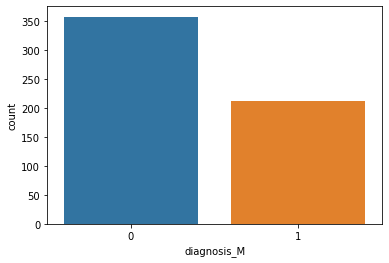

In [25]:
sns.countplot(x = dataset['diagnosis_M'], label='COUNT')
plt.show()
# 0 je B odnosno benigna masa, dok je 1 M odnosno maligni tumor

In [26]:
no_B = (dataset.diagnosis_M == 0).sum()
no_B
# 357 benignih 

357

In [27]:
no_M = (dataset.diagnosis_M == 1).sum()
no_M
# 212 malignih 
# Ponovo - dobijamo brojeve jer smo uradili one hot encode.
# Pretocili smo M i B kategorije u 1 i 0 respektivno korsiteci dummies funkciju.

212

### Korelaciona matrica 
- Korelisanost varijabli sa nasom target varijablom

In [28]:
# IZBACUJEMO target kolonu
dataset_2 = dataset.drop(columns='diagnosis_M')

In [29]:
dataset_2.shape

(569, 31)

In [30]:
dataset_2.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<AxesSubplot:title={'center':'Correlated with diagnosis_M'}>

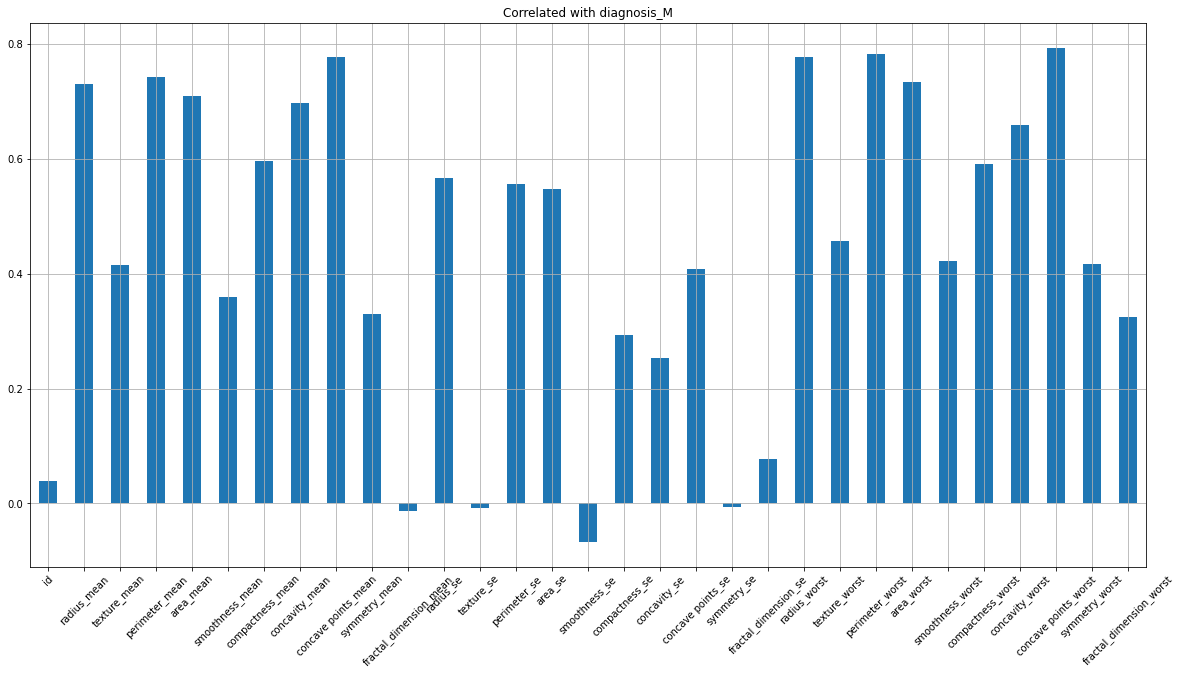

In [31]:
dataset_2.corrwith(dataset['diagnosis_M']).plot.bar(
    figsize = (20,10), title = 'Correlated with diagnosis_M', rot = 45, grid = True
)
# Proveravamo korelisanost nase target vrednosti (dijagnoze) sa ostalim atributima.
# Vidimo da vecina atributa ima POZITIVNU korelisanost sa nasom target vrednoscu, sto znaci da
# povecanjem jedne vrednosti raste i druga. Cetiri atributa ima NEGATIVNU korelisanos kao sto se vidi na slici dole.

In [32]:
corr = dataset.corr()

In [33]:
corr
# Korelaciona matrica SVIH varijabli sa SVIM ostalim varijablama

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,0.039769
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499


<AxesSubplot:>

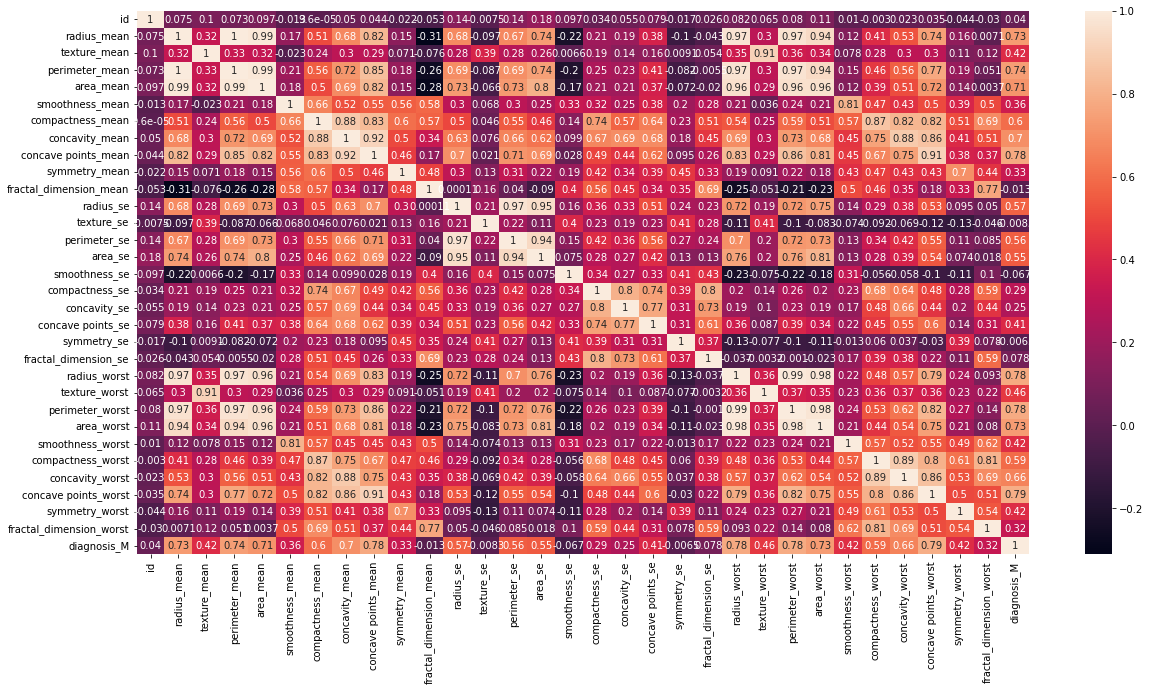

In [34]:
# Posto su podaci iznad dosta teski za analizu u ovom obliku posluzicemo se HEAT MAPOM za bolju vizuelizaciju
# same korelisanosti medju atributima.
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)

### Deljenje podataka na trening i test skup

In [35]:
dataset.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [36]:
# Matrica atributa (nezavisne varijable)
x = dataset.iloc[:, 1:-1].values # SVI redovi i kolone BEZ diagnosis_M

In [37]:
x.shape

(569, 30)

In [38]:
# Target vaijabla (zavisna varijabla)
y = dataset.iloc[:,-1].values # SVI redovi i SAMO poslednja kolona 

In [39]:
y.shape
# ovo je vektor sa 569 redova

(569,)

In [40]:
# Za deljenje na trening i test skup koristicemo scikit-learn model_selection 
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [41]:
from sklearn.model_selection import train_test_split # Koristimo klasu train_test_split iz biblioteke 

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

##### Proveravamo nase trening i test podatke. Koristili smo 20% ukupnih podataka za TEST.

In [43]:
x_train.shape

(455, 30)

In [44]:
x_test.shape

(114, 30)

In [45]:
y_train.shape

(455,)

In [46]:
y_test.shape

(114,)

### Skaliranje atributa

In [47]:
# Standardizacija atributa - neophodan korak u cilju optimizacije algoritama koje cemo korsititi
# Zelimo sve atribute da budu u istom intervalu (skali) kako ne bi doslo do prevelike 
# prioritizacije atributa koji imaju visoke vrednosti.
from sklearn.preprocessing import StandardScaler

In [48]:
sc = StandardScaler()

In [49]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
# STD i MEAN za trening set ali to ne radimo za test. Tu samo skaliramo (test set).
# Razlog - https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe

In [50]:
x_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [51]:
x_test

array([[-0.20175604,  0.3290786 , -0.13086754, ...,  1.3893291 ,
         1.08203284,  1.54029664],
       [-0.25555773,  1.46763319, -0.31780437, ..., -0.83369364,
        -0.73131577, -0.87732522],
       [-0.02619262, -0.8407682 , -0.09175081, ..., -0.49483785,
        -1.22080864, -0.92115937],
       ...,
       [ 1.71811488,  0.09318356,  1.7286186 , ...,  1.57630515,
         0.20317063, -0.15406178],
       [ 1.18859296,  0.34352115,  1.19333694, ...,  0.56019755,
         0.26991966, -0.27320074],
       [ 0.26263752, -0.58080224,  0.28459338, ..., -0.19383705,
        -1.15564888,  0.11231497]])

# 2. Modeliranje
Algoritmi koje smo izabrali za ovaj problem klasifikacije:
 - Logisticka regresija
 - Random forest

### Logisticka regresija

In [52]:
from sklearn.linear_model import LogisticRegression
# Kao prvi model za klasifikaciju u ovom problemu koristicemo Logisticku regresiju

In [53]:
classifier_lr = LogisticRegression(random_state=0)

In [54]:
classifier_lr.fit(x_train,y_train) # Default parametri svi ostali

LogisticRegression(random_state=0)

In [55]:
y_pred = classifier_lr.predict(x_test) # Kreiramo varijablu sa SVIM predvidjenim vrednostima (metoda predict)

### Rezultati modeliranja

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, recall_score

In [57]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)

In [58]:
results = pd.DataFrame([['Logistic Regression', acc, f1, precision, rec]],
                      columns = ['Model','Accuracy','F1 Score','Precision','Recall'])
results

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.964912,0.957447,0.957447,0.957447


## Malo teorije...

####  Preciznost i odziv (recall) jesu mere koje nam govore kakve su peformanse naseg modela, u ovom slucaju klasifikatora.
  - **Preciznost** -> koja je proporcija pozitivno identifikovanih instanci je zapravo stvarno pozitivna
  - **Odziv** -> koja je proporcija zapravo pozitivnih instanci identifikovana kao pozitivna
  
  
Preciznost i Odziv su uglavnom obrnuto proporcionalne mere, sto znaci da povecanje odziva dovodi do smanjenja preciznosti i obranto. Medjutim konkretna veza izmedju ove dve mere zavisi od GRANICE ODLUCIVANJA koja se koristi za odredjivanje pozitivnih instanci u modelu. 

Model koji klasifikuje instance kao pozitivne kada je VEOMA siguran veorvatno ima visoku preciznost a mali odziv. Sa druge strane, ako model klasifikuje instance kao pozitivne kada je BAR MALO siguran onda verovatno ima visok odziv a nisku preciznost. Ovaj trade-off preciznosti i odziva je razlog zasto se moraju uzeti u obzir obe metrike kada se evaluira klasifikator. Specificna granica odlucivanja zavisi direktno od konkretnog problema sa kojim se suocavamo.

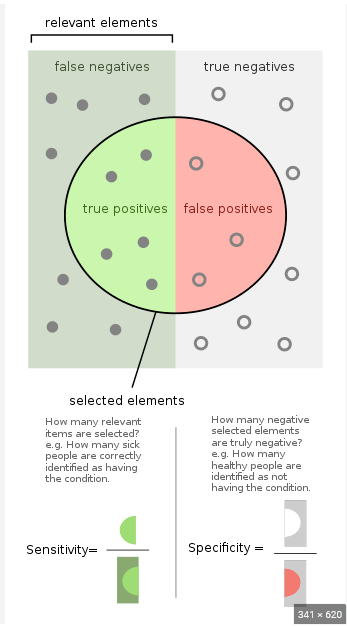

In [59]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[65  2]
 [ 2 45]]


#### Tip 1 greska jeste false positive greska koja se materijalizuje kada model predvidja da je odrejena instanca pozitivna ali zapravo je to suprotno od istine. Tip 2 greska jeste false negative gde model predvidja za instancu da je negativna ali je zapravo pozitivna.

Tip 1 greska se jos naziva i alfa greska, dok se tip 2 greska naziva beta greska. Koriscenjem ovih termina (alfa i beta greske) moze se odrediti cena FN i FP predikcija. 
U problemu binarne klasifikacije menjanje granice odlucivanja dovodi do povecanja jedne i smanjenja druge greske. Povecanjem granice (stroza granica) povecava se broj false negative a smanjuje se broj false positive i obratno.

Alfa greska se u testiranju hipoteze koristi kao granica za odredjivanje statisticke znacajnosti i obicno ima vrednost oko 0.05.
Beta greska se u testiranju hipoteze koristi za odredjivanje moci jednog testa, gde se obicno definise verovatnoca tacnog odbijanja nulte hipoteze kada je ona netacna.

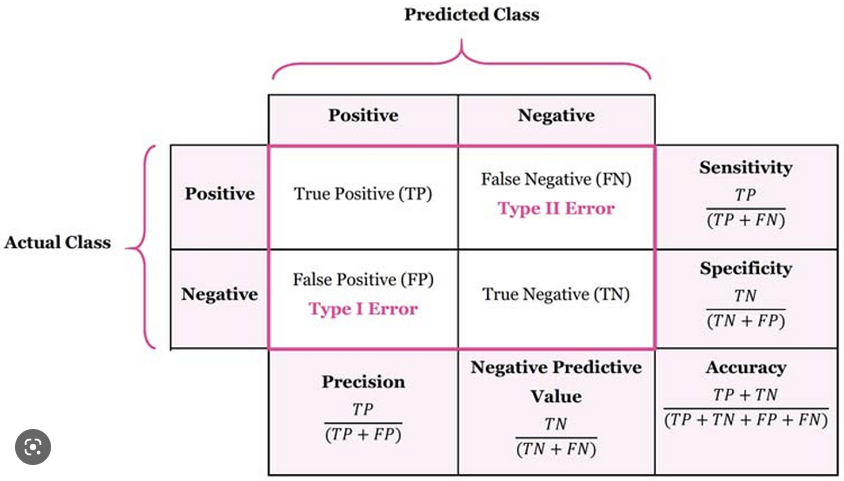

### Nulta hipoteza 
U statistickom eksperimetisanju postoji nesto sto se zove nulta (null) hipoteza (oznaka H0). Ova hipoteza kaze da NE POSTOJI znacajna veza izmedju varijabli koje se testiraju. U testiranju hipoteza cilj jeste da se pribavi dovoljno dokaza u korist odbacivanja nulte hipoteze a sve u svrhu prihvatanja alternativne hipoteze (H1) koja kaze da POSTOJI znacajna veza izmedju varijabli koje se testiraju.

**RAZLOG NULTE HIPOTEZE** jeste praktican. Jednostavno je mnogo lakse i prakticnije reci da NE POSTOJI veza izmedju varijabli nego vrsiti desetine i stotine testova (sa razlicitim rezultatima) i potom odluciti koji od tih testova uzeti kao prvu (pocetnu) hipotezu. Uvodjenjem pretpostavke da ne postoji znacajna veza izmedju varijabli daleko olaksavamo ceo proces testiranja hipoteza.

U nekim situacijama nije moguce oboriti nultu hipotezu ali to NE ZNACI da je nulta hipoteza tacna vec je to mozda znak da ne postoji dovoljno podataka a ti me i dokaza kako bi se ona oborila. U takvim situacijama prikupljanje dodatnih podataka ili koriscenje drugacijeg pristupa problemu moze pomoci u obaranju nulte hipoteze i prihvatanju alternativne hipoteze H1.

**p-vrednosti** jesu brojevi u intervalu [0,1] koji nam govore da li su rezultati jedne hipoteze (testa) statisticki dovoljno znacajni, odnosno da se rezultati NISU DESILI SLUCAJNO. Mera p-vrednosti jeste zapravo DOKAZ protiv nulte hipoteze u statistickom testiranju hipoteza. Generalno u praski p-vrednost preko 0.05 se smatra dovoljno visokom vrednoscu da se odbaci nulta hipoteza i prihvati alternativna hipoteza.

Ispod idu slike sa nekim primerima.

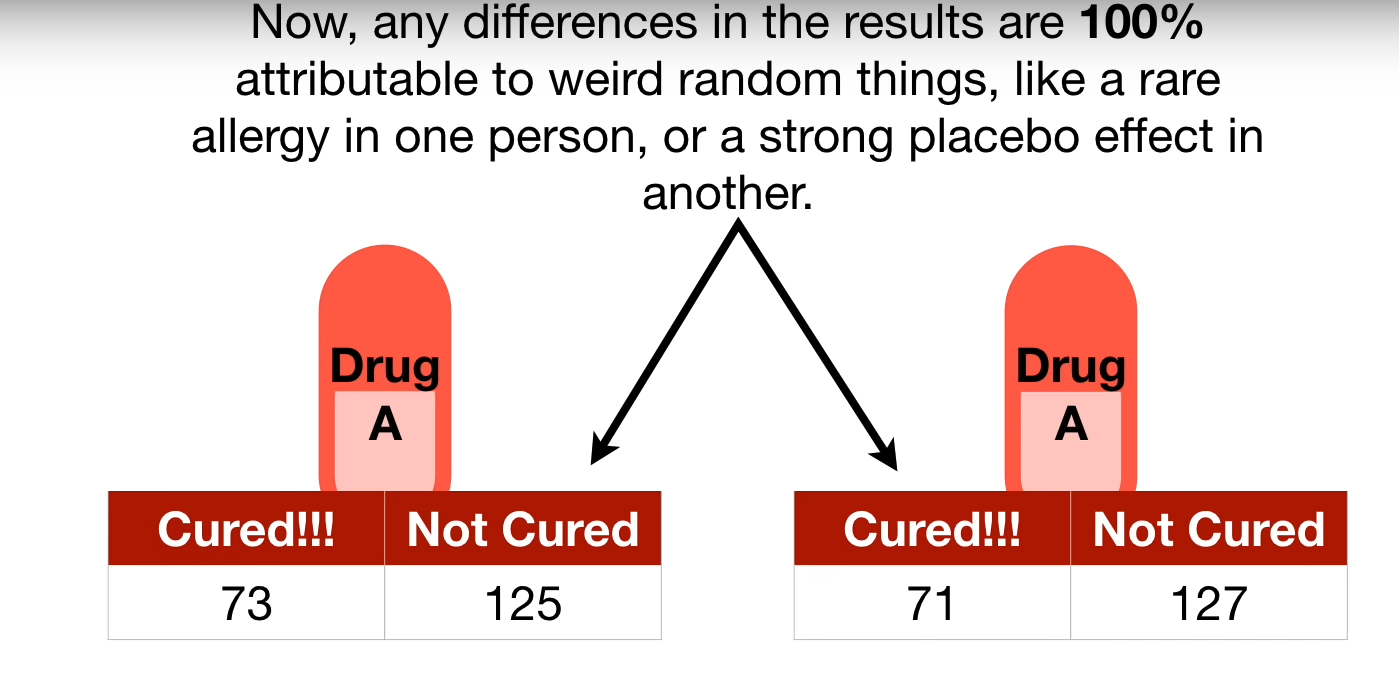

Kako je p-vrednost ogroma na slici ispod (cak 0.9), pretoceno u normalan jezik to znaci da ne postoji razlika izmedju ove dve grupe (ogromna je verovatnoca da ne postoji razlika zapravo). Dakle mozemo odbaciti nultu hipotezu da su ova dva leka nepovezana (nemaju slicnosti).

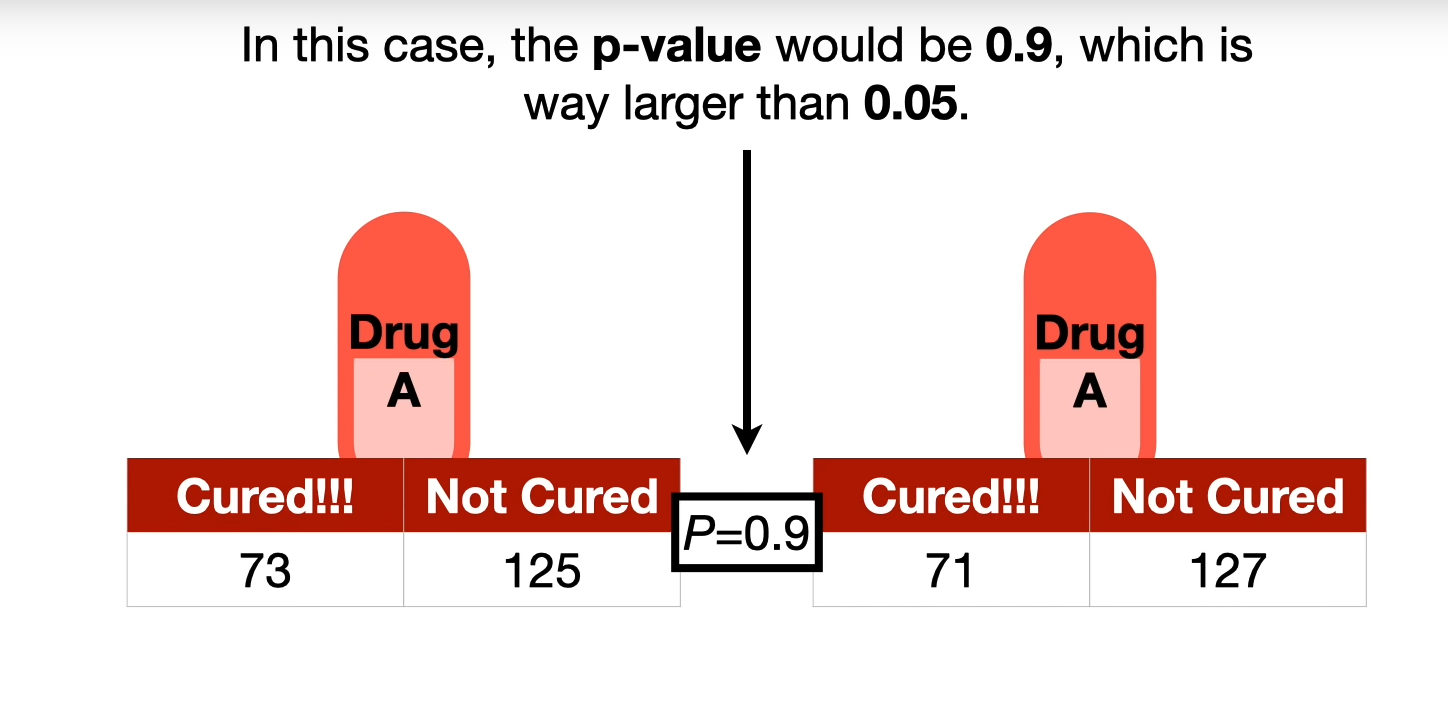

Medjutim ako ponavljamo ovakav eksperiment sa lekom A, moze se desiti u nekom trenu da TOTALNO SLUCAJNO grupisemo ljude koji imaju jak pacebo efekat (cured visok) i oni koji imaju neku alergiju na lek (stoga i manje cured ljudi). 
Kako smo koritili ISTI lek u obe grupe, a rezultati su drugaciji (broj ljudi je drugaciji znatno koji je izlecen), tada kazemo da **kada je p-vrednost niska a ne postoji razlika** - slucaj FALSE POSITIVE. 

*False positive* u smislu da postoji razlika (nisu povezani, niska p-vrednost) izmedju lekova a zapravo je nema(false) jer su lekovi isti (lek A).

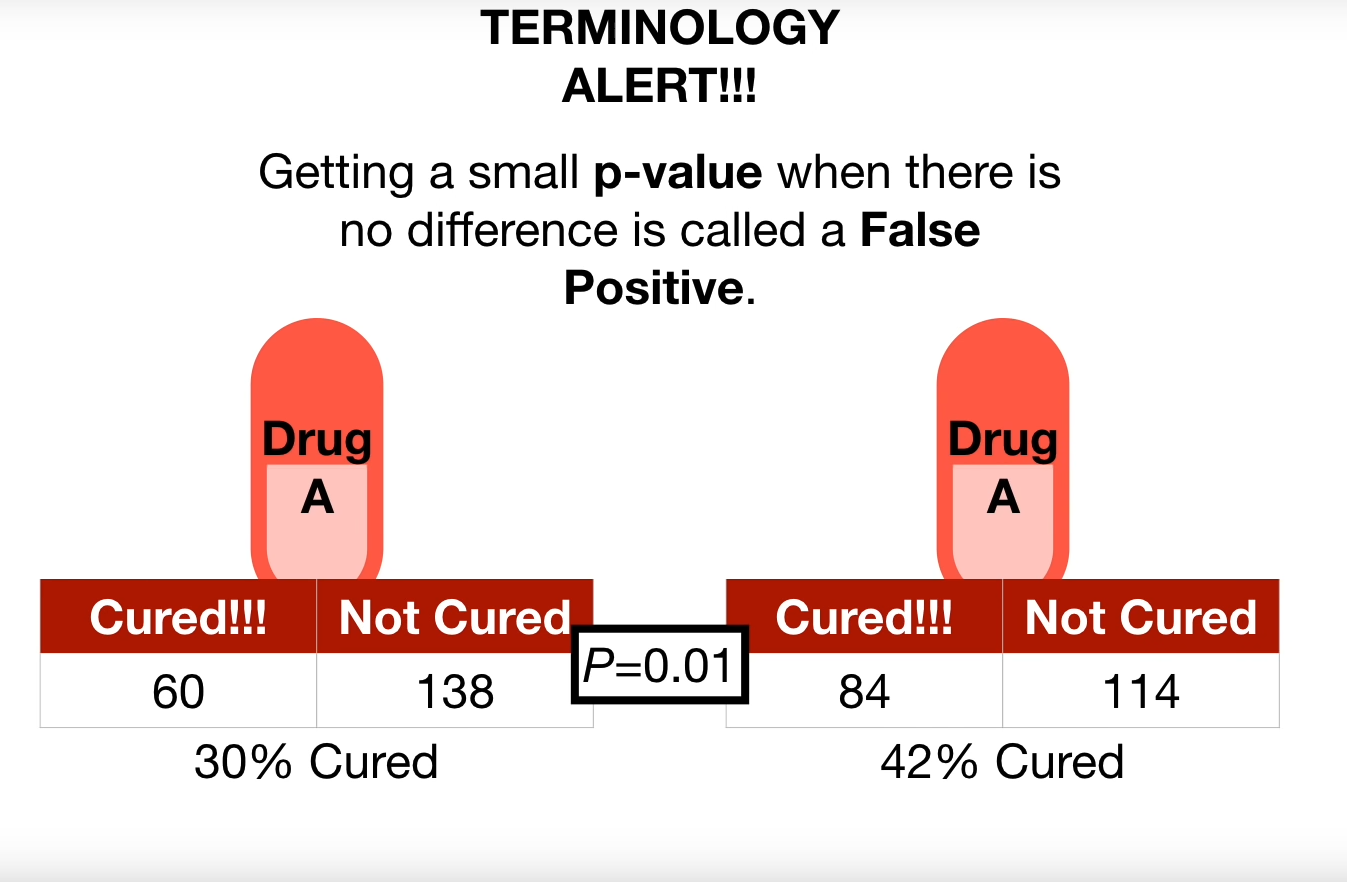

Granica p-vrednosti od 0.05 znaci da **ce 5% eksperimenata, gde se male razlike izmedju njih povezuju sa nasumicnim faktorima** generisati p-vrednosti manje od 0.05 (False positive).


Ako je veoma bitno da budemo precizni kada pricamo o razlici leka A i leka B, tada se moze koristiti i drugacija granica - konkretno 0.00001. To znaci da ce za svakih 100.000 eksperimenata postojait samo 1 FALSE POSITIVE.


Sa druge strane, ako nam preciznost nije bitna (na primer da li ce neka posiljka stici na vreme) tada se moze koristiti i visi prag p-vrednosti na primer 0.2. To znaci a ce za svakih 100.000 eksperimenata postojati 20.000 FALSE POSITIVE ili konkretnije 2 od svakih 10 slucajeva.


S tim u vezi, obicno se kao default granica uzima upravo 0.05 kao osnov, jer smanjivanje potencijalnih FALSE POSITIVE slucajeva ispod 5% uglavnom vise kosta nego sto donosi.


**Dakle, ako je p-vrednost < 0.05 za lekove A i B, tada mozemo doneti odluku da lek A ima razliku u odnosu na lek B, odnosno da ne postoji znacajna veza ova dva leka.**

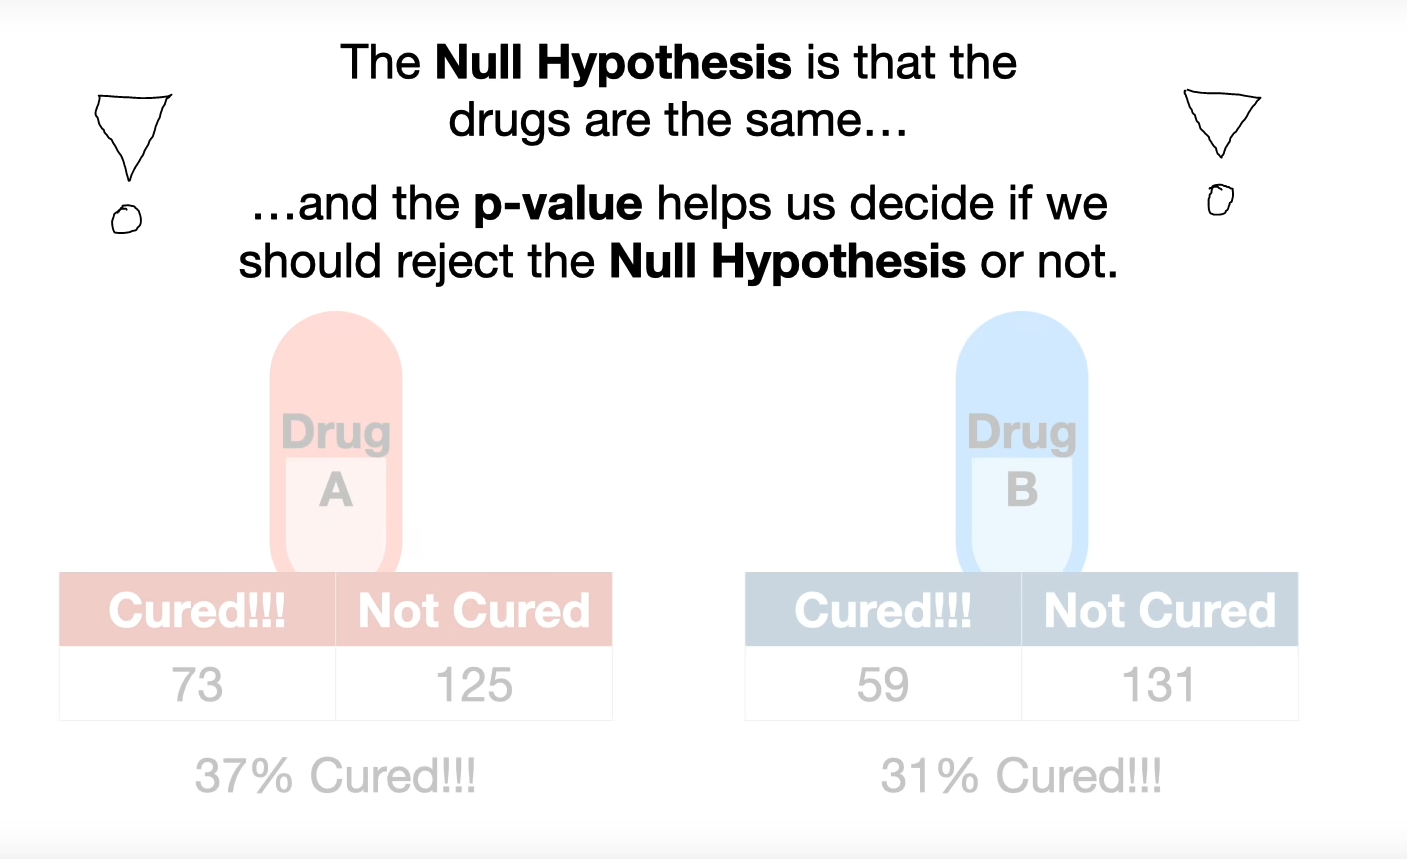

Medjutim, iako nam p-vrednost ukazuje na razliku leka A i leka B, ona nam ne govori **kolika je ta razlika**

Drugim recima, mozemo imati vrlo malu p-vrednost bez obzira na razliku leka A i B, gde razlika u pozadini moze biti vrlo mala ili pak ogromna.

Slike sa primerima ispod:

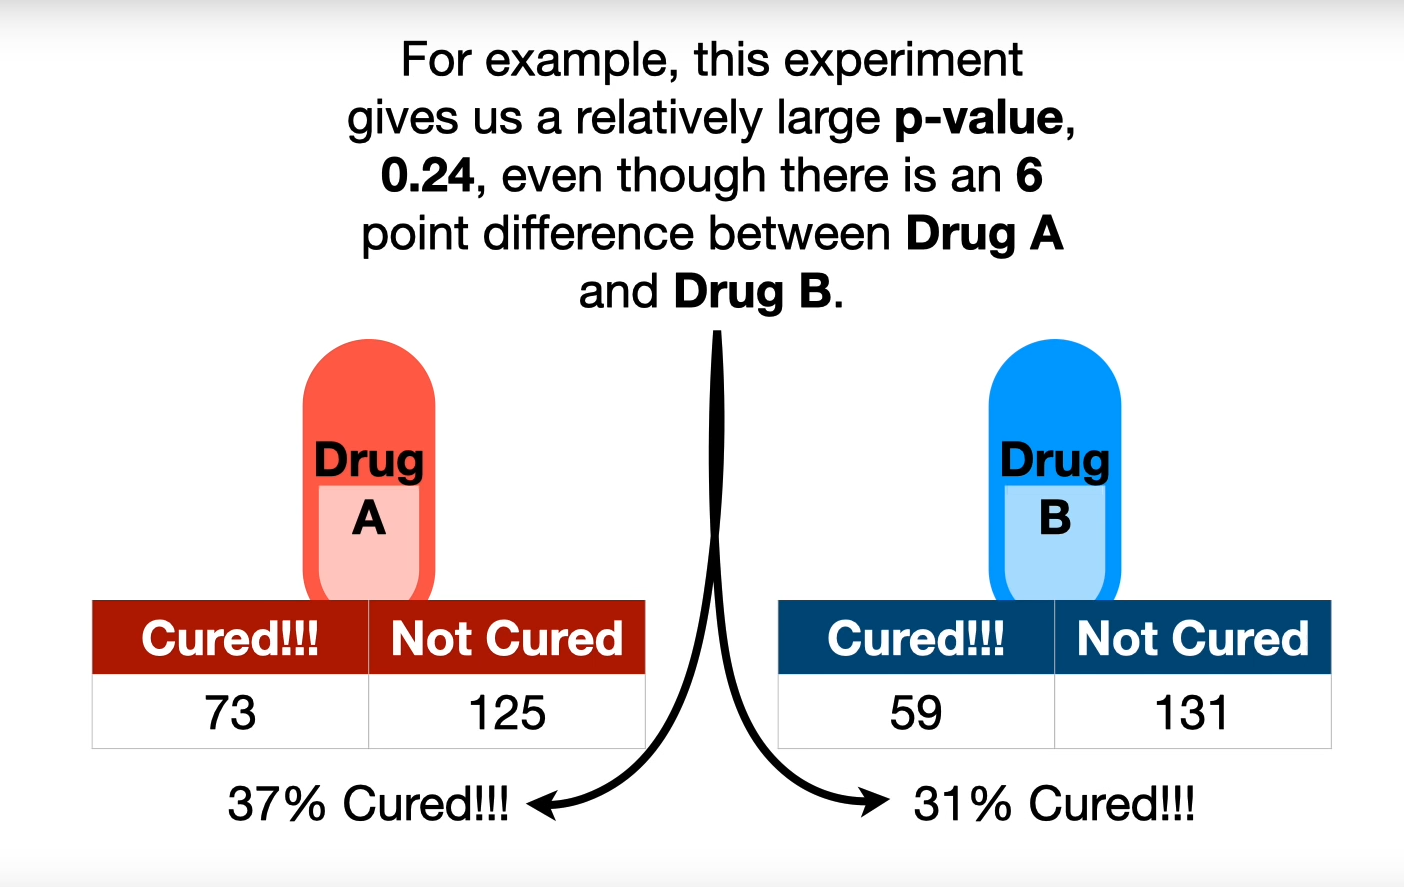

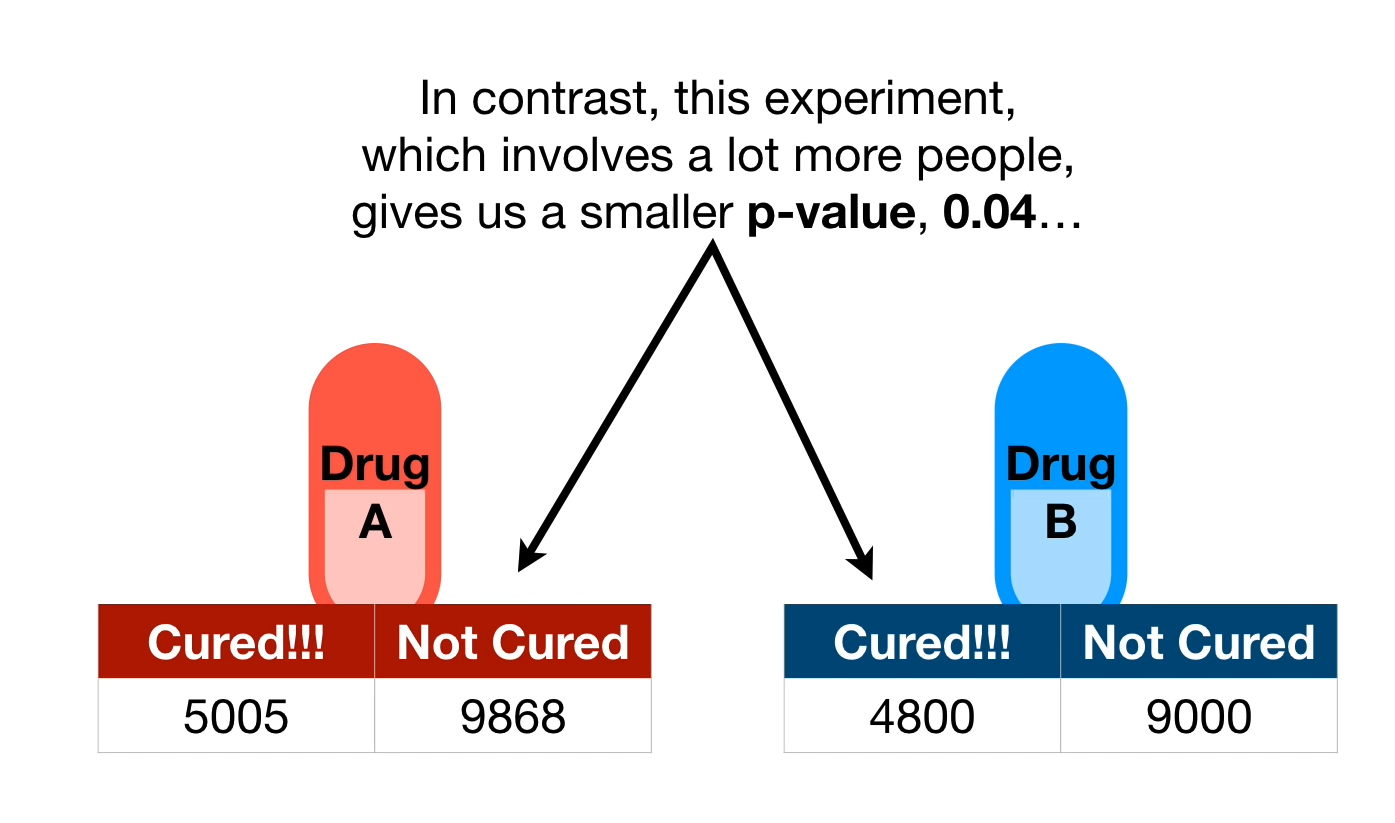

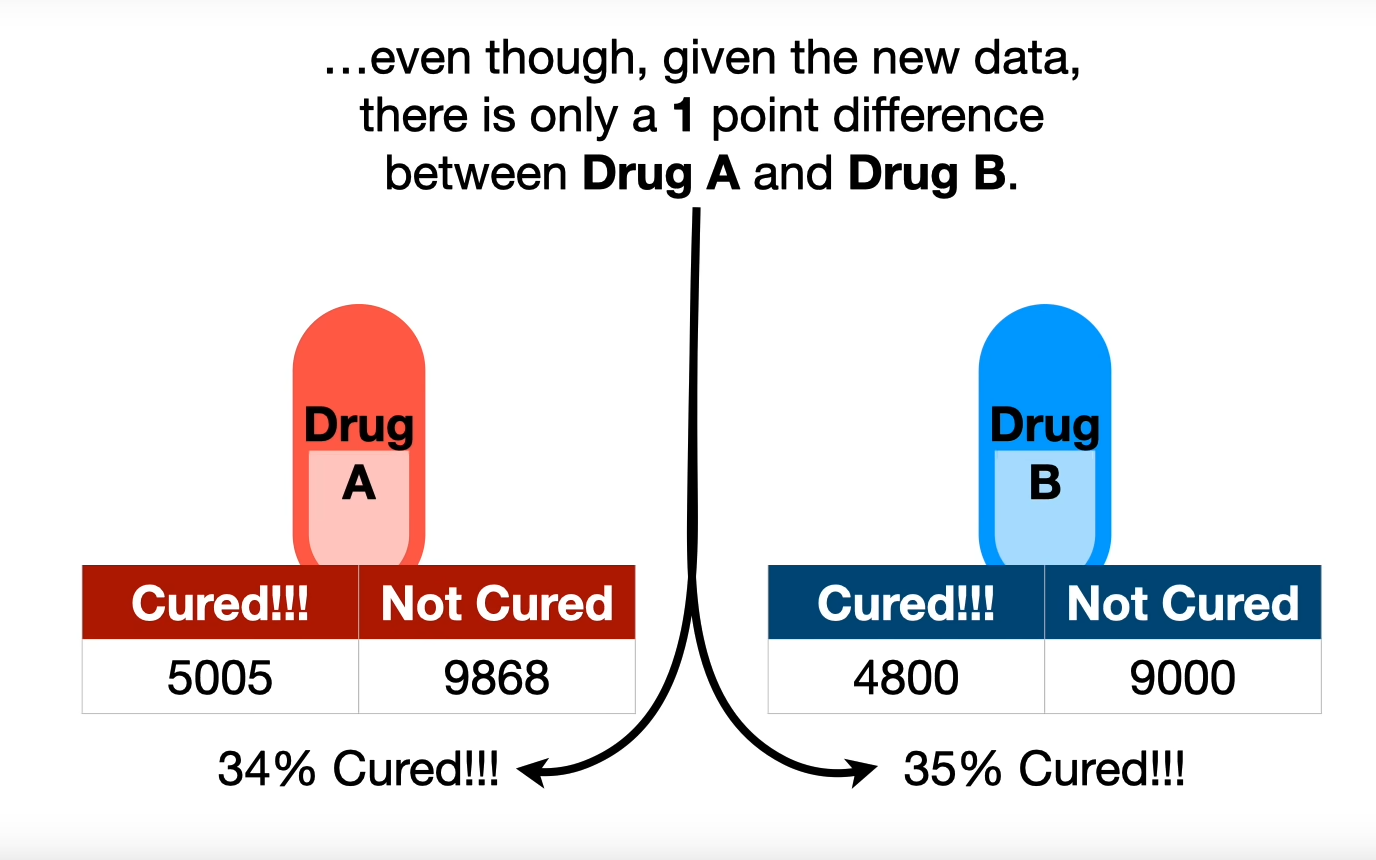

**Drugim recima, mala p-vrednost NAM NE GOVORI kolika je razlika leka A i leka B, ili koji je efekat leka.**

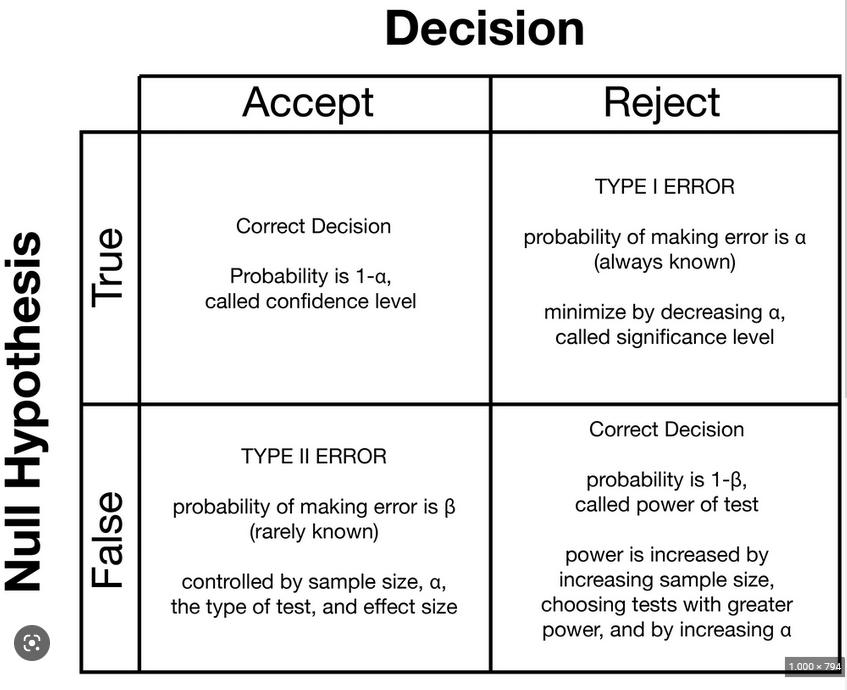

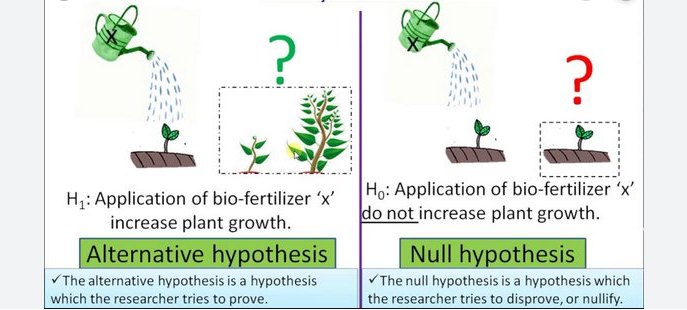

### Kros - validacija

In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
# Ova kros validacija ce generisati 10 accuracy vrednosti na osnovu podataka x_train i y_train i svaki put
# ce uzimati random vrednosti iz ovih podataka deset puta.
accuracies = cross_val_score(estimator=classifier_lr, X=x_train,y=y_train,cv=10)

In [64]:
# racunamo prosecnu vrednost preciznosti i standardnu devijaciju
print("Accuracy mean is {:.2f} %".format(accuracies.mean()*100))
print("Standard deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy mean is 97.81 %
Standard deviation is 1.98 %
